In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Rectangle
import cvxpy as cp

In [2]:
# data generation
rng = np.random.default_rng(5)
n = 3
radius = rng.uniform(1.0, 3.0, n)
init_centers = rng.uniform(-5.0, 5.0, (2, n))

In [ ]:
# build and solve optimization problem
centers = cp.Variable((n, 2), name='c')
constraints = []
for i in range(n - 1):
    #for j in range(i + 1, n):
    #   constraints += [cp.sum(cp.square(centers[:, i] - centers[:, j])) >=
    #                     (radius[i] + radius[j]) ** 2]

    constraints += [cp.sum(cp.square(centers[i, :] - centers[i+1:, :]), axis=1) >=
                     (radius[i] + radius[i+1:]) ** 2]

# initialize centers to random locations
centers.value = init_centers.T

obj = cp.Minimize(cp.max(cp.norm_inf(centers, axis=1) + radius))
prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.IPOPT, nlp=True, verbose=True, derivative_test='none',
              least_square_init_duals='no')

(CVXPY) Nov 11 09:30:35 AM: Your problem has 6 variables, 3 constraints, and 0 parameters.
(CVXPY) Nov 11 09:30:35 AM: It is compliant with the following grammars: 
(CVXPY) Nov 11 09:30:35 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 11 09:30:35 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 11 09:30:35 AM: Your problem is compiled with the CPP canonicalization backend.


                                     CVXPY                                     
                             v1.7.0.dev0+0.5870139                             
This is Ipopt version 3.11.9, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Starting derivative checker for first derivatives.

Starting derivative checker for second derivatives.


No errors detected by derivative checker.

Number of nonzeros in equality constraint Jacobian...:       18
Number of nonzeros in inequality constraint Jacobian.:       36
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:       16
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        6
Total number of inequality constrai

4.602738956134685

    -  1.00e+00 1.00e+00h  1
  13  4.6027390e+00 8.88e-16 5.92e-11 -11.0 3.72e-05    -  1.00e+00 1.00e+00h  1

Number of Iterations....: 13

                                   (scaled)                 (unscaled)
Objective...............:   4.6027389561609411e+00    4.6027389561609411e+00
Dual infeasibility......:   5.9169086297217177e-11    5.9169086297217177e-11
Constraint violation....:   8.8817841970012523e-16    8.8817841970012523e-16
Complementarity.........:   2.7543196603408701e-11    2.7543196603408701e-11
Overall NLP error.......:   5.9169086297217177e-11    5.9169086297217177e-11


Number of objective function evaluations             = 14
Number of objective gradient evaluations             = 14
Number of equality constraint evaluations            = 14
Number of inequality constraint evaluations          = 14
Number of equality constraint Jacobian evaluations   = 14
Number of inequality constraint Jacobian evaluations = 14
Number of Lagrangian Hessian evaluations             

In [6]:
# build and solve optimization problem
centers = cp.Variable((2, n), name='c')
constraints = []
for i in range(n - 1):
    for j in range(i + 1, n):
       constraints += [cp.sum(cp.square(centers[:, i] - centers[:, j])) >=
                         (radius[i] + radius[j]) ** 2]

# initialize centers to random locations
centers.value = init_centers#rng.uniform(-5.0, 5.0, (2, n))

obj = cp.Minimize(cp.max(cp.norm_inf(centers, axis=0) + radius))
prob = cp.Problem(obj, constraints)
prob.solve(solver=cp.IPOPT, nlp=True, verbose=True, derivative_test='none',
              least_square_init_duals='no')

(CVXPY) Nov 11 09:29:15 AM: Your problem has 6 variables, 3 constraints, and 0 parameters.
(CVXPY) Nov 11 09:29:15 AM: It is compliant with the following grammars: 
(CVXPY) Nov 11 09:29:15 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Nov 11 09:29:15 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
(CVXPY) Nov 11 09:29:15 AM: Your problem is compiled with the CPP canonicalization backend.


                                     CVXPY                                     
                             v1.7.0.dev0+0.5870139                             
This is Ipopt version 3.11.9, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:       18
Number of nonzeros in inequality constraint Jacobian.:       36
Number of nonzeros in Lagrangian Hessian.............:        6

Total number of variables............................:       16
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        6
Total number of inequality constraints...............:       18
        inequality constraints with only lower bounds:       18
   inequality constraints with lower and upper bounds:  

4.602738981619183

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 1.07e+01 1.00e+00   0.0 0.00e+00    -  0.00e+00 0.00e+00   0
   1  9.5030525e+00 8.88e-16 3.14e+02   0.5 9.50e+00    -  3.14e-03 1.00e+00f  1
   2  9.5025787e+00 8.88e-16 2.60e+01  -0.3 4.73e-01   2.0 1.00e+00 1.00e+00h  1
   3  7.8484094e+00 4.44e-16 1.34e+01  -0.4 5.25e+00    -  9.17e-01 4.89e-01f  1
   4  4.9791612e+00 1.11e-16 1.64e+00  -1.9 4.31e+00    -  1.00e+00 8.78e-01f  1
   5  4.7456537e+00 8.88e-16 5.13e-01  -2.7 2.54e+00    -  1.00e+00 6.87e-01f  1
   6  4.6573246e+00 4.44e-16 3.32e-01  -2.7 4.73e+00    -  1.00e+00 3.56e-01h  1
   7  4.6291504e+00 8.88e-16 1.28e-02  -2.6 3.37e-01    -  1.00e+00 9.77e-01h  1
   8  4.6125834e+00 4.44e-16 2.95e-02  -3.1 5.15e-01    -  1.00e+00 7.39e-01h  1
   9  4.6064227e+00 4.44e-16 3.82e-04  -3.4 1.32e-01    -  9.98e-01 1.00e+00h  1
iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
  10  4.6028059e+00 8.88e-16

Circle packing (ratio=0.659)


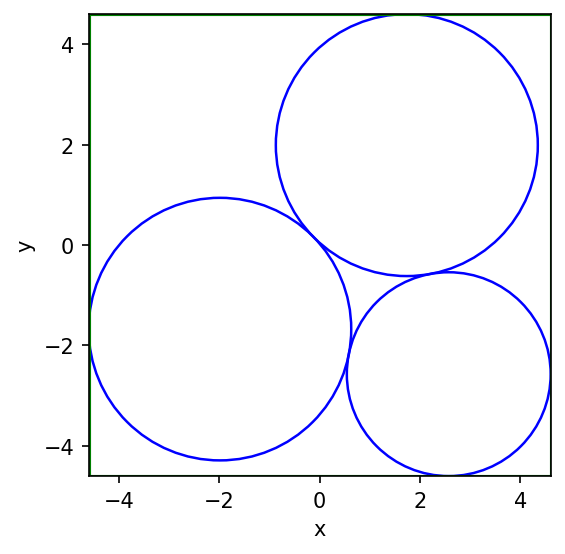

In [14]:
# plot circles
centers = centers.value.T
#centers = centers.value
L = prob.value 

square_size = float(L) * 2
pi = np.pi
ratio = pi * np.sum(np.square(radius)) / (square_size**2)

# create plot to visualize the packing
fig, ax = plt.subplots(figsize=(4, 4))
ax.set_aspect("equal", adjustable="box")
fig.set_dpi(150)

# draw circles
for i in range(n):
    x_val = centers[0, i]
    y_val = centers[1, i]
    if x_val is None or y_val is None:
        msg = f"Circle center value not assigned for index {i}."
        raise ValueError(msg)
    circle = Circle(
        (float(x_val), float(y_val)),  # (x, y) center
        radius[i],  # radius
        fill=False,  # outline only
        ec="b",
        lw=1.2,  # edge color/width
    )
    ax.add_patch(circle)

# draw square border
border = Rectangle(
    (-square_size / 2, -square_size / 2),  # bottom-left
    square_size,
    square_size,  # width, height
    fill=False,
    ec="g",
    lw=1.5,
)
ax.add_patch(border)

# limits and cosmetics
ax.set_xlim(float(-square_size / 2), float(square_size / 2))
ax.set_ylim(float(-square_size / 2), float(square_size / 2))
ax.set_xlabel("x")
ax.set_ylabel("y")
#ax.set_title(f"Circle packing (ratio={ratio:.3f})")
print(f"Circle packing (ratio={ratio:.3f})")
plt.show()